# **See It to Believe It: The Role of Data Visualization Tools in AI**

## Facial Recognition and the Power of Data Visualization

Facial recognition technology has become crucial for unlocking both physical and digital doors by verifying identity through unique facial features. However, challenges such as lookalike faces and biased datasets can complicate the process, leading to potential risks in places like security checkpoints.

## Challenges in Facial Recognition

High-quality data is the backbone of reliable facial recognition. Yet, issues like:
- **Class imbalance**: Uneven distribution of data classes
- **Mislabeled samples**: Incorrectly annotated data
can undermine even the most advanced models.

## Leveraging Data Visualization for Better AI
Fortunately, tools like [FiftyOne](https://docs.voxel51.com/getting_started/install.html) offer powerful insights for improving datasets. These tools utilize techniques such as:
- **Clustering**: Grouping similar data points
- **Dimensionality reduction**: Simplifying high-dimensional data for better understanding

## What You'll Learn
In this notebook, we’ll explore:
1. **The significance of data quality for visual AI applications**
2. **How FiftyOne enhances dataset management for facial recognition**
3. **A practical walkthrough of FiftyOne’s features for compelling data exploration**

---

### Key Takeaway
The key to building better AI starts with seeing your data differently. Let's dive into how FiftyOne can transform your approach to dataset management!


In [2]:
import warnings
warnings.filterwarnings('ignore')
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
import matplotlib.pyplot as plt


## Setup

### Step 1: Create a Virtual Environment

Before installing any libraries, it's a good practice to isolate your project dependencies by creating a virtual environment 

 `python3 -m venv facial-env`

### Step 2: Install Necessary Libraries

1. **Install FiftyOne** 

    `pip install fiftyone`

2. **Install UMAP**

    `pip install umap-learn`

### Step 3: Verify Installations


In [3]:
# Verify FiftyOne
print(f"FiftyOne version: {fo.__version__}")

FiftyOne version: 1.1.0


## Loading the LFW Dataset

The **Labeled Faces in the Wild [(LFW)](https://docs.voxel51.com/dataset_zoo/datasets.html#labeled-faces-in-the-wild)** dataset is a public benchmark for facial recognition models. It can be easily accessed from the FiftyOne Dataset Zoo.

### Dataset Overview
- **Total Images**: 13,000+ labeled images
- **Test Split**: 3,708 images
- **Number of People**: Over 5,000 individuals
- **Detection Method**: Viola-Jones face detector

The LFW dataset is widely used for evaluating facial recognition systems and serves as a foundational resource for benchmarking model performance.


In [5]:
dataset = foz.load_zoo_dataset(name_or_url = "lfw", 
                               dataset_name = "lfw_testset",
                               split="test")


Split 'test' already downloaded
Loading 'lfw' split 'test'
 100% |███████████████| 3708/3708 [1.4s elapsed, 0s remaining, 2.7K samples/s]         
Dataset 'lfw_testset' created


In [6]:
dataset

Name:        lfw_testset
Media type:  image
Num samples: 3708
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)

### View one data point 

In [7]:
dataset.head(1)

[<Sample: {
     'id': '67866c985a3710ef9d148711',
     'media_type': 'image',
     'filepath': '/home/vanshika/fiftyone/lfw/test/AJ_Lamas/AJ_Lamas_0001.jpg',
     'tags': ['test'],
     'metadata': None,
     'created_at': datetime.datetime(2025, 1, 14, 13, 54, 32, 649000),
     'last_modified_at': datetime.datetime(2025, 1, 14, 13, 54, 32, 649000),
     'ground_truth': <Classification: {
         'id': '67866c985a3710ef9d148710',
         'tags': [],
         'label': 'AJ_Lamas',
         'confidence': None,
         'logits': None,
     }>,
 }>]

## Visualizing Data Distributions

**FiftyOne** provides powerful tools to visualize data (faces) and labels directly within the notebook.

### Key Features:
- **Group Labels**: Easily organize and group labels for better insights.
- **Assign Tags**: Add new tags to segment the dataset based on specific criteria.
- **Identify Issues**: Quickly spot anomalies or inconsistencies in the data.
- **View Unique Names**: Explore and analyze unique labels or categories within the dataset.

These visualization capabilities make it simple to gain a deeper understanding of your dataset and address potential problems effectively.



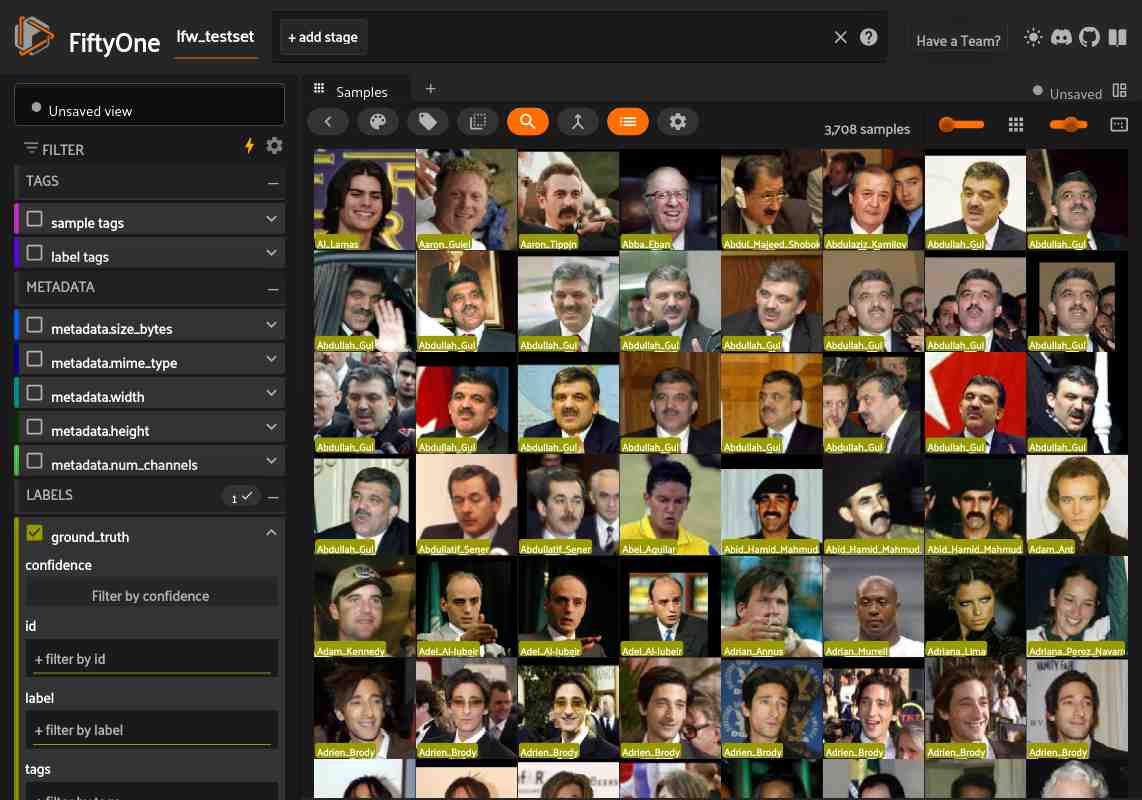

In [6]:
session = fo.launch_app(dataset)

In [7]:
session.freeze()

## Addressing Class Imbalances

Class imbalance poses a significant challenge in the **LFW dataset**. Here's what I found in the testset:
- **1,215 individuals** have only one labeled data point.
- Some names have significantly more images than others, which can lead to potential model bias.

### Identifying Class Imbalance
To address this, I ran a simple `if-else` block to find the names with the highest frequencies in the dataset.



In [13]:
count_obj = dataset.count_values("ground_truth.label")

keep_ones = []
keep_tens = []
keep_fifs = []
keep_huns = []

for name,val in count_obj.items():
    if val == 1:
        keep_ones.append(name)
    elif val > 1 and val <= 10:
        keep_tens.append(name)
    elif val > 10 and val <= 50:
        keep_fifs.append(name)
    elif val > 50:
        keep_huns.append(name)

counts = {"ones": len(keep_ones), 
          "tens" : len(keep_tens), 
          "fifties": len(keep_fifs), 
          "fifty+" : len(keep_huns)
}
counts

{'ones': 1215, 'tens': 456, 'fifties': 37, 'fifty+': 3}

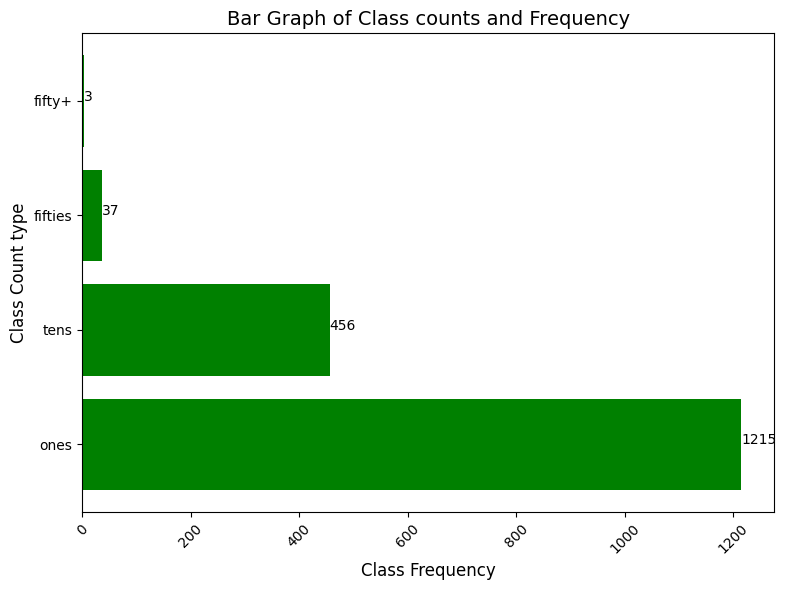

In [14]:
# Create the bar graph
plt.figure(figsize=(8, 6))
plt.barh(counts.keys(), counts.values(), color='green')

# Add labels and title
plt.xlabel('Class Frequency', fontsize=12)
plt.ylabel('Class Count type', fontsize=12)
plt.title('Bar Graph of Class counts and Frequency', fontsize=14)
plt.xticks(rotation=45)
# Show value labels on top of each bar
for i, value in enumerate(counts.values()):
    plt.text(value, i, str(value), ha='left', fontsize=10)

# Display the graph
plt.tight_layout()
plt.show()

### Top Three Names with 50+ Images:
- **Donald Rumsfeld**
- **Gerhard Schroeder**
- **Jacques Chirac**

By identifying such imbalances, we can take steps to mitigate their impact, such as using data augmentation or weighted loss functions during model training.

In [33]:
keep_huns

['Donald_Rumsfeld', 'Gerhard_Schroeder', 'Jacques_Chirac']

In [23]:
view = dataset.select_by(field='ground_truth.label', values= keep_huns)
view

Dataset:     lfw_testset
Media type:  image
Num samples: 282
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    clip_embeddings:  fiftyone.core.fields.VectorField
    clip_umap:        fiftyone.core.fields.VectorField
View stages:
    1. SelectBy(field='ground_truth.label', values=['Donald_Rumsfeld', 'Gerhard_Schroeder', 'Jacques_Chirac'], ordered=False)


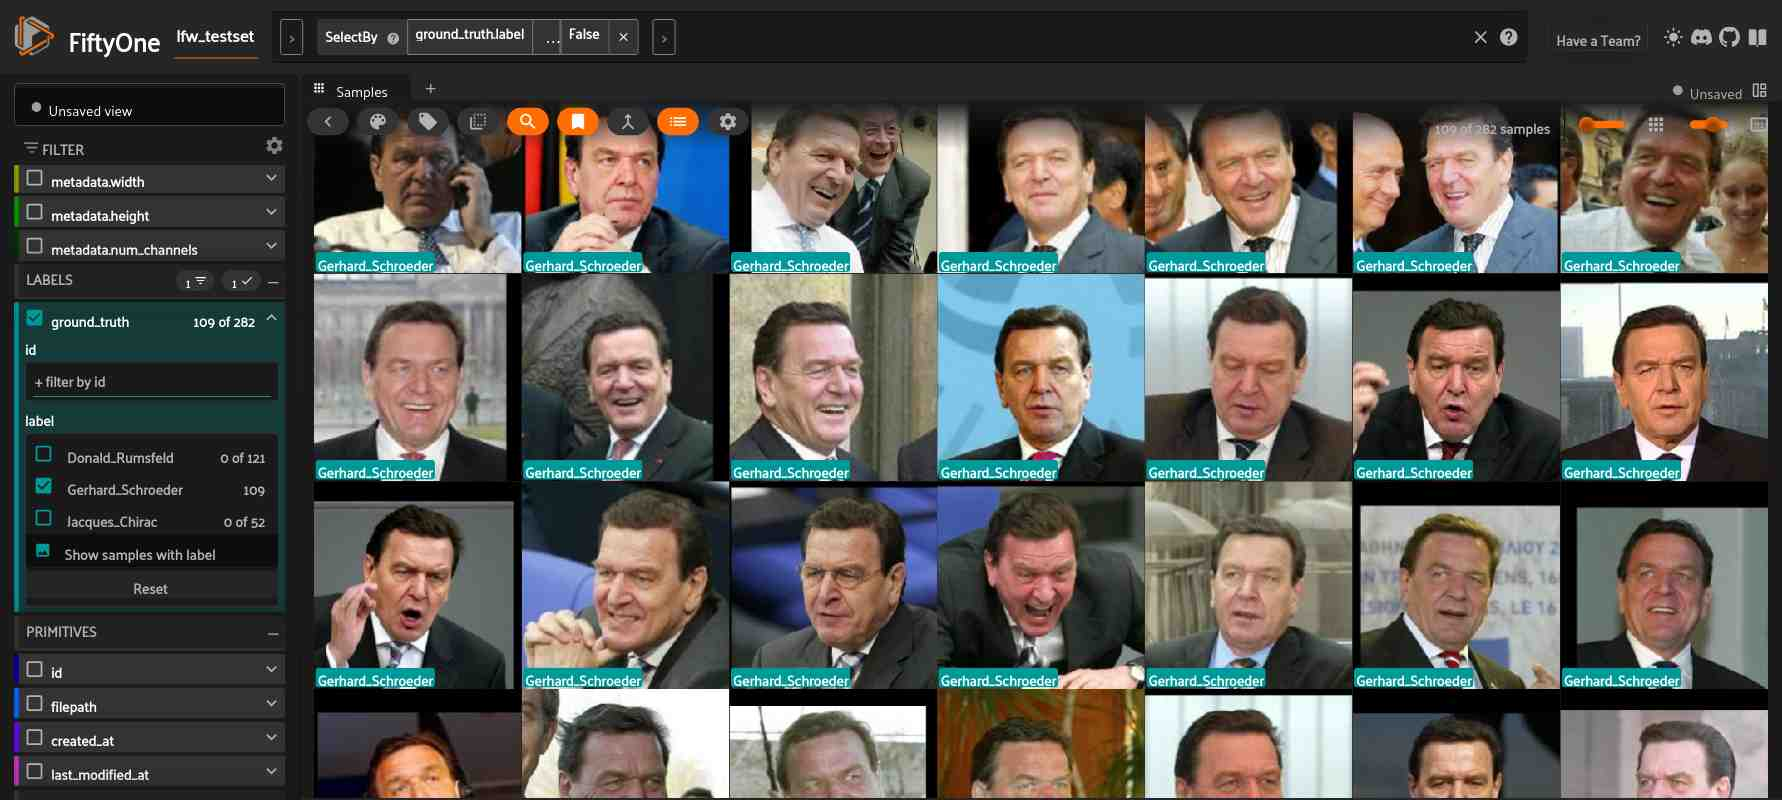

In [24]:
session.view = view

In [25]:
session.freeze()

## Detecting Outliers with FiftyOne’s Brain

Outliers can distort model learning, but **FiftyOne** uses advanced dimensionality reduction techniques and pre-trained models to identify anomalies effectively.

### Dimensionality Reduction with UMAP:

- Preserves both local and global structures.
- Scalable for uncovering complex relationships in large datasets.

### Using FiftyOne’s `compute_visualization()`
To detect outliers, we use the `compute_visualization()` function provided by FiftyOne Brain. Here's how it works:

- **`method` Argument**: Allows you to choose between `t-SNE` or `UMAP`.
- **`brain_key` Argument**: Assigns a name to access the results later.

- **Field for Storing Results**:
  - The embeddings are stored in a field, `clip_embeddings`.
  - We also create a new field, `clip_umap`, to hold the resulting 2D representations.



In [15]:
res = fob.compute_visualization(
    dataset,
    model="clip-vit-base32-torch",
    embeddings="clip_embeddings",
    method="umap",
    brain_key="clip_vis",
    batch_size=10
)
dataset.set_values("clip_umap", res.current_points)

Computing embeddings...
 100% |███████████████| 3708/3708 [13.9s elapsed, 0s remaining, 280.1 samples/s]      
Generating visualization...
UMAP( verbose=True)
Tue Jan 14 09:06:51 2025 Construct fuzzy simplicial set
Tue Jan 14 09:06:59 2025 Finding Nearest Neighbors
Tue Jan 14 09:07:02 2025 Finished Nearest Neighbor Search
Tue Jan 14 09:07:04 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Jan 14 09:07:08 2025 Finished embedding


Using **UMAP**, we found that **Michael Jackson** stands out as an outlier, not only for his legendary dance moves but also for his unique facial features.



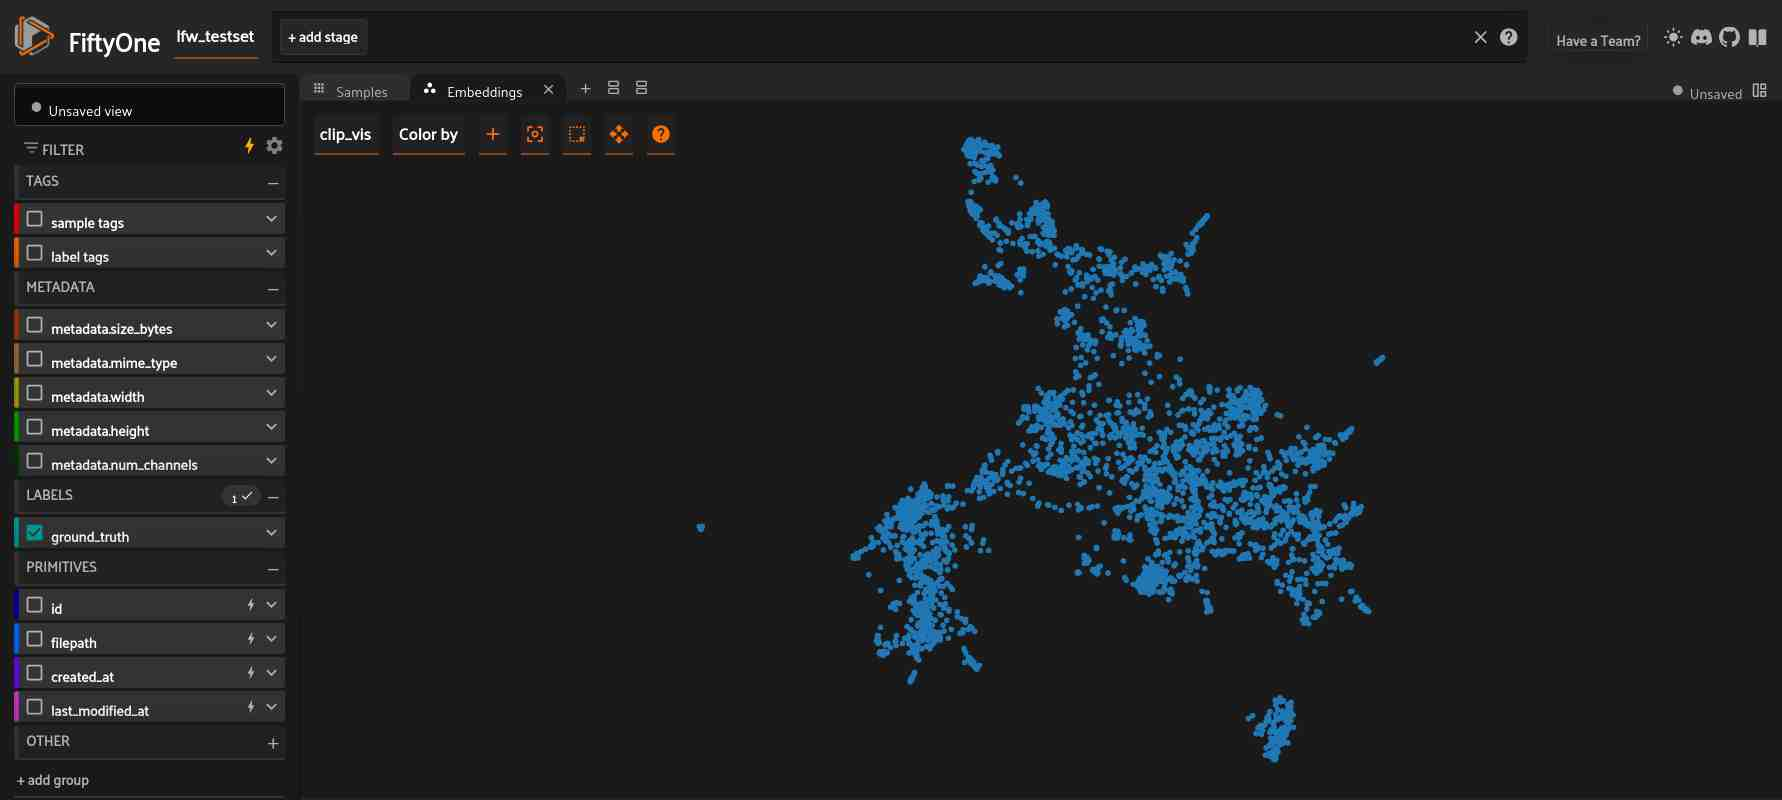

In [26]:
session = fo.launch_app(dataset)

In [32]:
session.freeze()

### Dimensionality Reduction with t-SNE

- Emphasizes local patterns and clusters.
- Ideal for spotting anomalies within smaller, dense regions.

We create a new field, `clip_tsne`, to hold the resulting 2D representations.

In [28]:
res = fob.compute_visualization(
    dataset,
    model="clip-vit-base32-torch",
    embeddings="clip_embeddings",
    method="tsne",
    brain_key="clip_vis_tsne",
    batch_size=10
)
dataset.set_values("clip_tsne", res.current_points)

Generating visualization...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3708 samples in 0.023s...
[t-SNE] Computed neighbors for 3708 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3708
[t-SNE] Computed conditional probabilities for sample 2000 / 3708
[t-SNE] Computed conditional probabilities for sample 3000 / 3708
[t-SNE] Computed conditional probabilities for sample 3708 / 3708
[t-SNE] Mean sigma: 2.013799
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 83.2445145, gradient norm = 0.0170138 (50 iterations in 0.817s)
[t-SNE] Iteration 100: error = 81.1484375, gradient norm = 0.0005454 (50 iterations in 0.466s)
[t-SNE] Iteration 150: error = 81.1356812, gradient norm = 0.0000811 (50 iterations in 0.438s)
[t-SNE] Iteration 200: error = 81.1357651, gradient norm = 0.0000692 (50 iterations in 0.413s)
[t-SNE] Iteration 250: error = 81.1359406, gradient norm = 0.0001409 (50 iterations in 0.462s)
[t-SNE] KL 

With **t-SNE**, another outlier emerged: **John Bolton**, whose distinctive appearance sets him apart in the dataset.

These techniques provide a clear way to detect anomalies and improve dataset quality for facial recognition models.


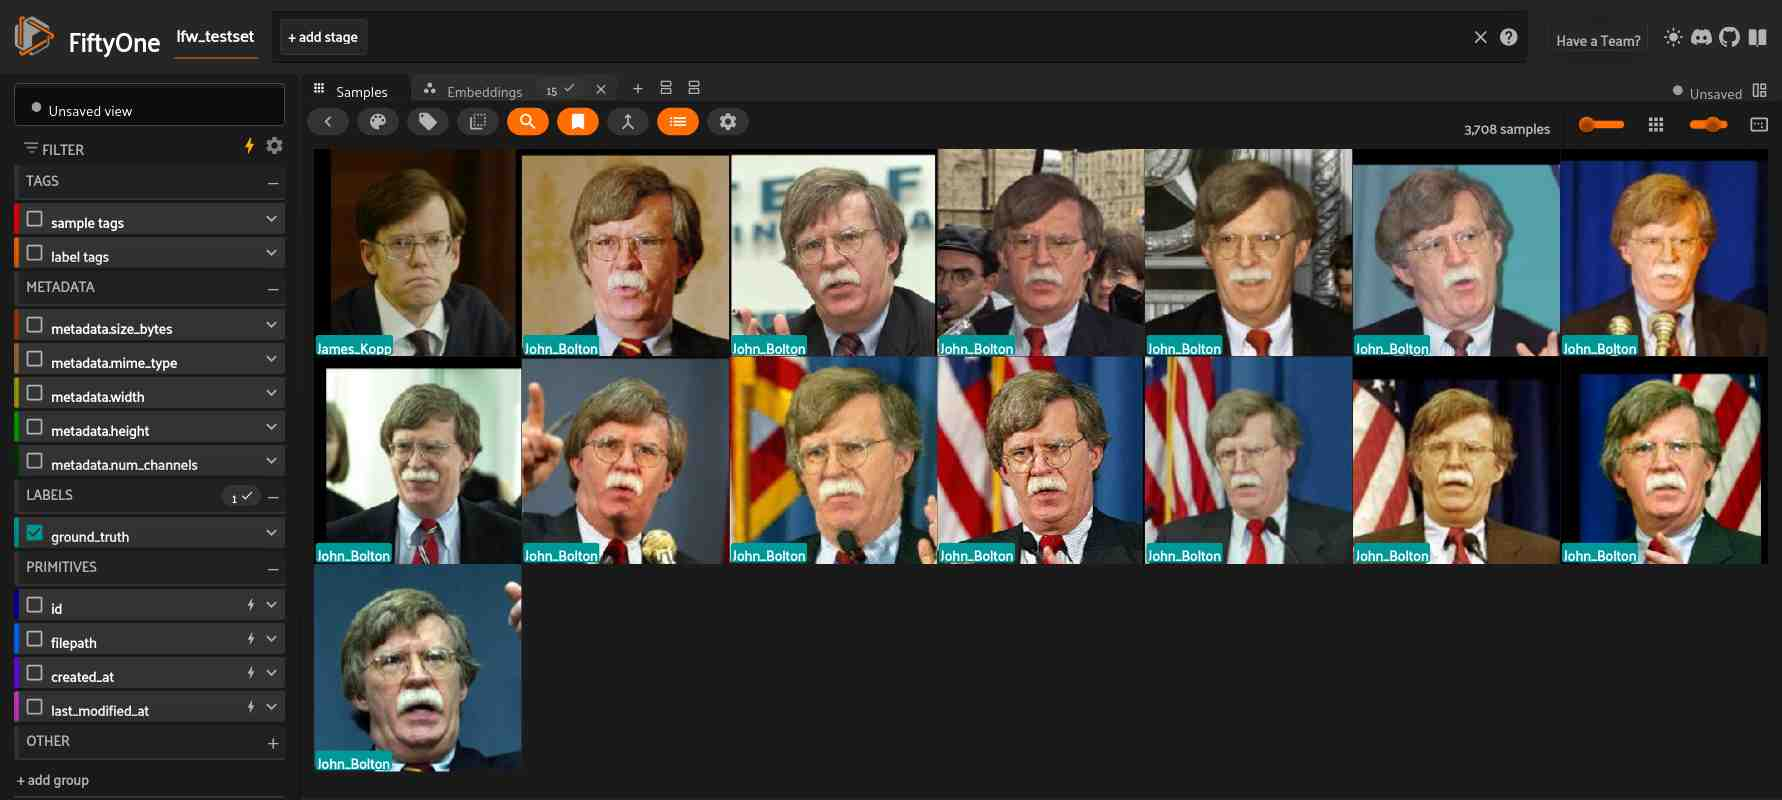

In [ ]:
session = fo.launch_app(dataset)

In [30]:
session.freeze()

## Customizing Embedding-Based Visualizations

With embedding-based visualizations in FiftyOne, you can go beyond basic outlier detection and explore similarities between data points. For instance, you can find visually similar faces within your dataset.

### Example: Finding Similar Faces
Using FiftyOne, we discovered the following similarity:
- **Gary Davis** is visually similar to **Ernie Eves** and two other individuals in the dataset.

This type of customization allows for deeper insights, such as identifying clusters of similar faces or uncovering subtle relationships in the data.



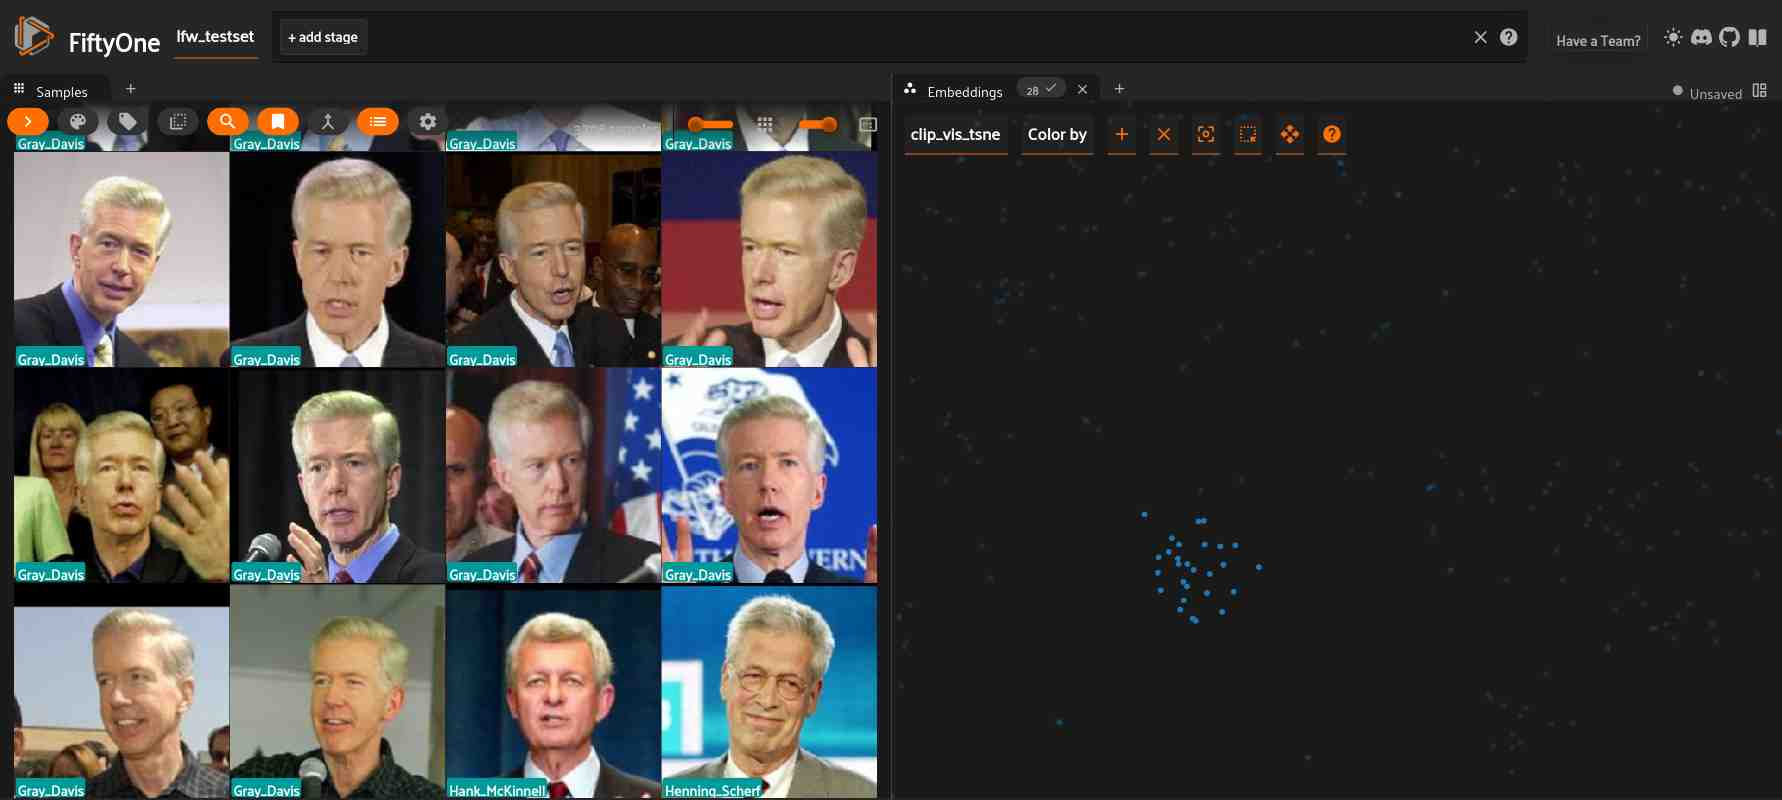

In [34]:
session = fo.launch_app(dataset)

In [35]:
session.freeze()